In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


2024-04-19 10:38:08.141592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 10:38:09.095085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-19 10:38:11.181168: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Image: dog4.jpeg
Predicted: [('n02100877', 'Irish_setter', 0.9846644), ('n02102318', 'cocker_spaniel', 0.0052851955), ('n02102480', 'Sussex_spaniel', 0.0024587607)]


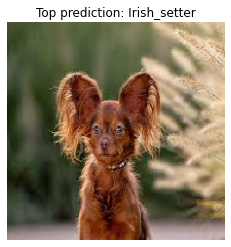

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Image: cat3.jpeg
Predicted: [('n02124075', 'Egyptian_cat', 0.53668797), ('n02123159', 'tiger_cat', 0.3078861), ('n02123045', 'tabby', 0.13733572)]


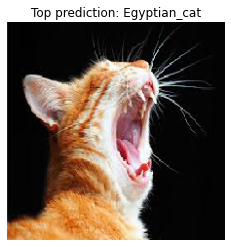

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Image: cmp2.jpeg
Predicted: [('n03529860', 'home_theater', 0.53953487), ('n03290653', 'entertainment_center', 0.22082198), ('n04404412', 'television', 0.099219516)]


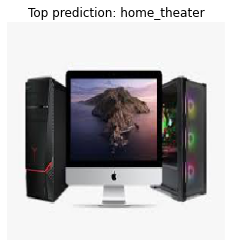

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Image: cmp.jpeg
Predicted: [('n03782006', 'monitor', 0.3425819), ('n03180011', 'desktop_computer', 0.1275475), ('n04152593', 'screen', 0.12545958)]


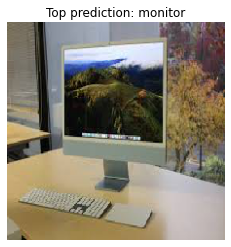

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Image: dog1.jpeg
Predicted: [('n02099601', 'golden_retriever', 0.5240705), ('n02088094', 'Afghan_hound', 0.33174926), ('n02091831', 'Saluki', 0.072334036)]


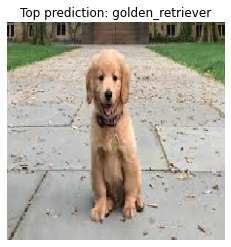

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Image: cat.jpeg
Predicted: [('n02123045', 'tabby', 0.44618434), ('n02124075', 'Egyptian_cat', 0.42986047), ('n02123159', 'tiger_cat', 0.0680188)]


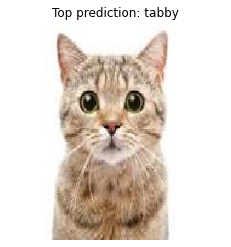

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Image: dog.jpeg
Predicted: [('n02093647', 'Bedlington_terrier', 0.3542055), ('n02105641', 'Old_English_sheepdog', 0.2933939), ('n02113799', 'standard_poodle', 0.20166244)]


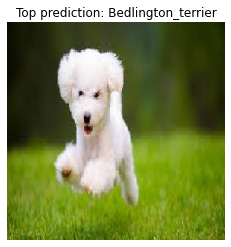

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Image: cat4.jpeg
Predicted: [('n02123159', 'tiger_cat', 0.4189421), ('n02124075', 'Egyptian_cat', 0.28013074), ('n02123045', 'tabby', 0.21479186)]


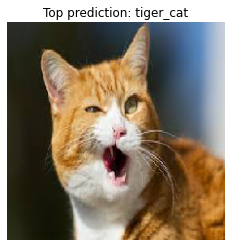

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Image: dog3.jpeg
Predicted: [('n02110958', 'pug', 0.683921), ('n02108422', 'bull_mastiff', 0.11839921), ('n02109525', 'Saint_Bernard', 0.056929126)]


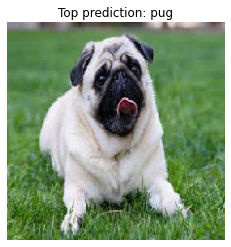

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Image: dog2.jpeg
Predicted: [('n02111277', 'Newfoundland', 0.8145337), ('n02108551', 'Tibetan_mastiff', 0.1722214), ('n02097474', 'Tibetan_terrier', 0.005788735)]


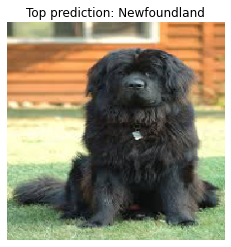

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Image: cat1.jpeg
Predicted: [('n02124075', 'Egyptian_cat', 0.5684126), ('n02123045', 'tabby', 0.17265171), ('n02127052', 'lynx', 0.119414665)]


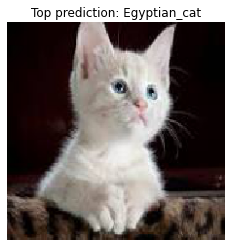

In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG16 pre-trained model
model = VGG16(weights='imagenet')

# Path to the images folder
images_folder_path = 'images'  # Replace with your images folder path

# Get list of all image files in the folder
image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Loop over each image file
for img_name in image_files:
    # Full path to the image
    img_path = os.path.join(images_folder_path, img_name)
    
    # Load and process the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Make a prediction
    predictions = model.predict(x)
    
    # Decode the results into a list of tuples (class, description, probability)
    prediction = decode_predictions(predictions, top=3)[0]
    
    # Print the image path and prediction
    print('Image:', img_name)
    print('Predicted:', prediction)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.title(f"Top prediction: {prediction[0][1]}")
    plt.show()
